In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/gurgaon_property_data_after_Missing_Value_Imputation (1)')
df.sample(10)

,Property_type,society,sector,price,Price_per_sqrt,Area,bedRoom,bathroom,balcony,floorNum,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
2123,flat,orris aster court,sector 85,0.93,5671.0,1639.922412,3.0,3.0,3,8.0,Relatively New Property,1587.0,0,0,0,0,0,1,26.0
3376,house,dlf city plots,sector 26,12.50,38580.0,3240.020000,4.0,5.0,3+,2.0,Moderately Old,3240.0,1,1,0,0,0,1,75.0
2765,flat,eldeco accolade,sohna road,0.95,6178.0,1537.714471,2.0,2.0,0,8.0,Under Construction,1050.0,1,0,0,0,1,0,72.0
2829,flat,puri emerald bay,sector 104,1.80,8823.0,2040.122407,2.0,3.0,2,23.0,New Property,1529.0,0,1,0,0,0,1,44.0
1808,flat,godrej summit,sector 104,0.75,5910.0,1269.035533,2.0,2.0,3,6.0,Relatively New Property,1141.0,0,0,0,0,1,1,57.0
3032,house,Independent,sector 50,13.20,27155.0,4860.980000,6.0,6.0,0,2.0,Moderately Old,4861.0,0,0,0,0,0,0,16.0
3425,house,Independent,sector 57,7.25,26852.0,2699.990000,9.0,9.0,3+,2.0,New Property,2700.0,0,1,0,1,1,2,145.0
199,flat,m3m soulitude,sector 89,1.32,16923.0,780.003545,3.0,3.0,2,1.0,New Property,878.0,0,0,0,0,0,0,96.0
2313,flat,breez global heights,sector 36,0.24,5825.0,412.017167,1.0,1.0,3+,8.0,New Property,464.0,0,0,0,0,0,1,49.0
3037,house,Independent,sector 7,2.00,11111.0,1800.020000,2.0,2.0,3,2.0,Relatively New Property,1800.0,0,0,0,0,0,1,0.0


In [18]:
age_price_df=df.groupby('agePossession')['price'].mean().reset_index()

In [19]:
import plotly.express as px
fig = px.bar(age_price_df, x='agePossession', y='price',
             title="agePossession vs. Average Price",
             labels={'agePossession': 'Property Age', 'price': 'Average Price'},
             color='agePossession',
             color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96'])
    ## show graph
fig.show()

In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# # Base URL for Google Search
# BASE_URL = "https://www.google.com/search?q="

# # Headers to simulate a real browser visit
# HEADERS = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
# }


# # Function to scrape latitude and longitude
# def get_coordinates(sector):
#     search_term = f"sector {sector} gurgaon longitude & latitude"
#     response = requests.get(BASE_URL + search_term, headers=HEADERS)

#     if response.status_code == 200:
#         soup = BeautifulSoup(response.content, 'html.parser')
#         coordinates_div = soup.find("div", class_="Z0LcW t2b5Cf")
#         if coordinates_div:
#             return coordinates_div.text
#     return None


# # Create a DataFrame
# df = pd.DataFrame(columns=["Sector", "Coordinates"])

# # Iterate over sectors and fetch coordinates
# for sector in range(1, 116):
#     coordinates = get_coordinates(sector)
#     df = df.append({"Sector": f"Sector {sector}", "Coordinates": coordinates}, ignore_index=True)

# # Save DataFrame
# df.to_csv("df.csv", index=False)

In [82]:
df1=pd.read_csv('/content/latlong.csv')
df1.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [83]:
df1.shape

(129, 2)

In [84]:
df1['lat']=df1['coordinates'].str.split(',').str.get(0).str.replace('° N','').astype(float)
df1['long']=df1['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype(float)

In [85]:
df1.head()

,sector,coordinates,lat,long
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [86]:
df1.to_csv('lat_long_gurgaon',index=False)

In [97]:
fig = px.scatter(df, x='Built_Up_area', y='price',
             title="agePossession vs. Average Price",
             labels={'Built_Up_area': 'Built Up area', 'price': 'Price'},
             color='sector',
             color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96'])
fig.update_layout(xaxis_range=[0, 10000],yaxis_range=[0,25])
    ## show graph
fig.show()

In [89]:
new=pd.merge(df,df1,on='sector')

In [88]:
new=new[['price','Price_per_sqrt','Built_Up_area','lat','long','sector']]

In [100]:
new_df=new.groupby('sector').mean()[['price','Price_per_sqrt','Built_Up_area','lat','long']]

In [119]:
new_df.to_csv('sector wise price distribution')

In [126]:
# Scatter Plot on Mapbox
fig = px.scatter_mapbox(new_df,
                        lat="lat",
                        lon="long",
                      color='Price_per_sqrt',size='Built_Up_area',color_continuous_scale=px.colors.cyclical.IceFire,text=new_df.index,
                        zoom=10,
                        height=600)

# Mapbox settings (Use your Mapbox token if required)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [121]:
import plotly.express as px

fig_new = px.scatter_geo(new_df,
                         lat="lat",
                         lon="long",
                         color='Price_per_sqrt',
                         size='Built_Up_area',
                         color_continuous_scale=px.colors.cyclical.IceFire,
                         text=new_df.index,
                         height=600)

# Update the layout for better visualization without Mapbox
fig_new.update_layout(
    geo=dict(
        projection_type="mercator",
        showland=True,
        landcolor="lightgray"
    )
)
fig.show()


In [125]:
fig=px.scatter_mapbox(new_df,
                        lat="lat",
                        lon="long",
                      color='Price_per_sqrt',size='Built_Up_area',color_continuous_scale=px.colors.cyclical.IceFire,hover_name=new_df.index,
                        zoom=10, mapbox_style="open-street-map",height=100,width=1200)
fig.show()

In [155]:
df2=pd.read_csv('/content/gurgaon_properties_cleaned_data (1)')
df2.head()

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1.0,Not available,4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F..."
1,flat,Apna Enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1.0,Not available,1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',..."
2,flat,Tulsiani Easy in Homes,sohna road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3.0,Not available,12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian..."
3,flat,Smart World Orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2.0,Study Room,2.0,NaN,23-Dec,"['Sector 55-56 Metro station', 'Bestech Centra...",NaN,"['Security / Fire Alarm', 'Private Garden / Te..."
4,flat,Parkwood Westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3.0,Study Room,5.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",[],NaN


In [156]:
df2['features']=df2['features'].apply(lambda x: eval(x) if isinstance(x, str) and "[" in x else [])

In [157]:
df2['features']

,features
0,"[Feng Shui / Vaastu Compliant, Security / Fire..."
1,"[Security / Fire Alarm, Maintenance Staff, Wat..."
2,"[Power Back-up, Feng Shui / Vaastu Compliant, ..."
3,"[Security / Fire Alarm, Private Garden / Terra..."
4,[]
...,...
3838,"[Feng Shui / Vaastu Compliant, Private Garden ..."
3839,"[Feng Shui / Vaastu Compliant, High Ceiling He..."
3840,"[High Ceiling Height, Maintenance Staff, Water..."
3841,"[Feng Shui / Vaastu Compliant, Private Garden ..."


In [153]:
text=" ".join(feature for sublist in df2['features'] for feature in sublist)
text

'Feng Shui / Vaastu Compliant Security / Fire Alarm Lift(s) Water Storage Visitor Parking Security / Fire Alarm Maintenance Staff Water Storage Park Visitor Parking Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Swimming Pool Park Fitness Centre / GYM Club house / Community Center Security / Fire Alarm Private Garden / Terrace Lift(s) Maintenance Staff False Ceiling Lighting Water Storage Visitor Parking Swimming Pool Natural Light Airy Rooms Fitness Centre / GYM Club house / Community Center Water softening plant Power Back-up Intercom Facility Lift(s) Swimming Pool Maintenance Staff Park Security Personnel Internet/wi-fi connectivity Fitness Centre / GYM Club house / Community Center Rain Water Harvesting Water softening plant Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Swimming Pool Park Security Personnel Fitness Centre / GYM Club house / Community Center Rain Water Harvesting Security / Fire Alarm Intercom Facility Lift(s) Mainten

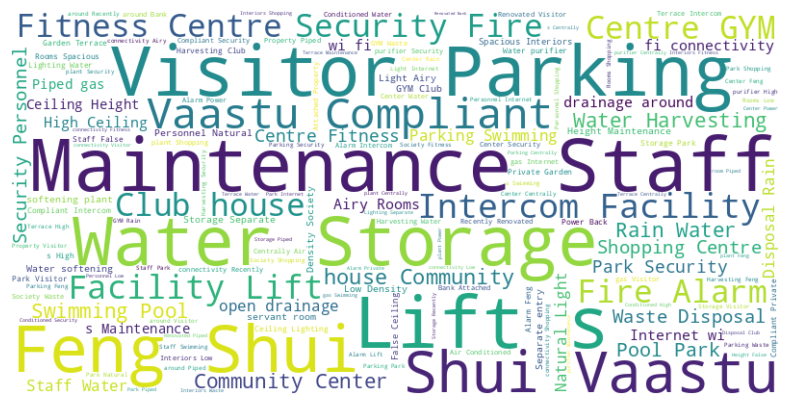

In [158]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.title('Word of aminities of gurgoan real estate property')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
import plotly.express as px

# Create the pie chart
fig = px.pie(df, names='bedRoom')

# Customizing the chart
fig.update_traces(textinfo='percent+label',  # Show percentage and label
                  marker=dict(colors=['#FF6347', '#4CAF50', '#1E90FF']))  # Customize colors
fig.update_layout(title='Distribution of Bedrooms',  # Custom title
                  showlegend=True,  # Show legend
                  font=dict(size=14, color='black'),  # Customize font
                  margin=dict(t=40, b=40, l=40, r=40))  # Adjust margins

# Show the plot
fig.show()


In [22]:
px.box(df,x='bedRoom',y='price')

In [27]:
fig = px.box(df[df['bedRoom']<=4], x='bedRoom', y='price',title='Bedroom Prices in Gurgaon Real Estate')

# Customizing the box plot
fig.update_traces(marker=dict(color='#1E90FF'),  # Change the color of the box plots
                  boxmean='sd',  # Show mean with standard deviation
                  jitter=0.05)  # Add slight jitter to points for better visualization

# Customize layout for a more polished look
fig.update_layout(
    title='Distribution of Bedroom Prices in Gurgaon',  # Custom title
    title_x=0.5,  # Center align the title
    xaxis_title='Number of Bedrooms',  # X-axis title
    yaxis_title='Price in cr',  # Y-axis title
    font=dict(family='Arial', size=14, color='black'),  # Font customization
    showlegend=False,  # Hide the legend (not necessary for this plot)
    plot_bgcolor='rgba(240, 240, 240, 0.95)',  # Change the plot background color
    margin=dict(t=40, b=40, l=40, r=40)  # Adjust plot margins
)

<Axes: xlabel='price', ylabel='Count'>

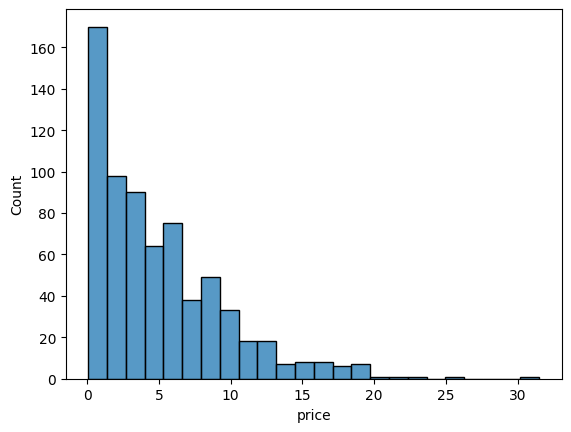

In [30]:
sns.histplot(df[df['Property_type']=='house']['price'])

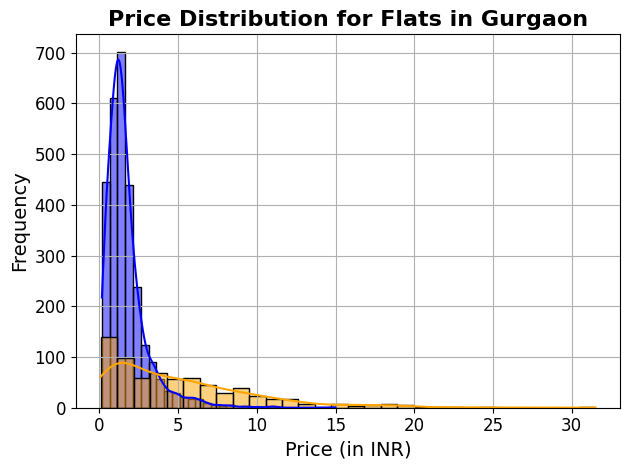

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram with KDE for the 'price' column where 'Property_type' is 'flat'
sns.histplot(df[df['Property_type'] == 'flat']['price'], kde=True, color='blue', bins=30,l)
sns.histplot(df[df['Property_type'] == 'house']['price'], kde=True, color='orange', bins=30)
# Customize the plot
plt.title('Price Distribution for Flats in Gurgaon', fontsize=16, fontweight='bold')  # Title with font customization
plt.xlabel('Price (in INR)', fontsize=14)  # X-axis label with fontsize
plt.ylabel('Frequency', fontsize=14)  # Y-axis label with fontsize
plt.grid(True)  # Enable grid lines
plt.tick_params(axis='both', which='major', labelsize=12)  # Customize tick labels size

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


In [37]:
px.histogram(df[df['Property_type'] == 'flat'], x='price', histnorm='density', nbins=30, title='Price Distribution for Flats in Gurgaon')


<ipython-input-42-c8066fe54c4f>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-42-c8066fe54c4f>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




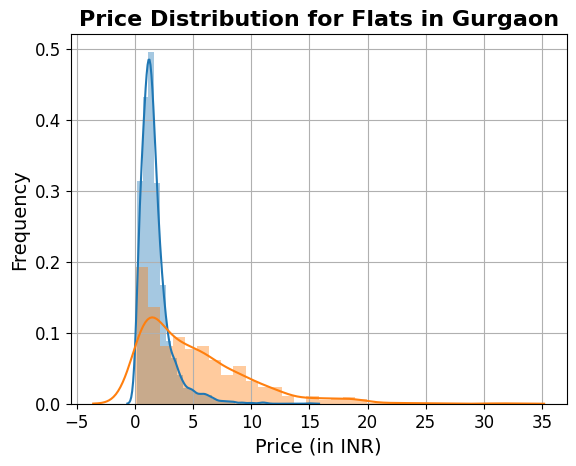

In [42]:
# Create the histogram with KDE for the 'price' column where 'Property_type' is 'flat'
sns.distplot(df[df['Property_type'] == 'flat']['price'], bins=30,label='flat')
sns.distplot(df[df['Property_type'] == 'house']['price'], bins=30,label='house')
# Customize the plot
plt.title('Price Distribution for Flats in Gurgaon', fontsize=16, fontweight='bold')  # Title with font customization
plt.xlabel('Price (in INR)', fontsize=14)  # X-axis label with fontsize
plt.ylabel('Frequency', fontsize=14)  # Y-axis label with fontsize
plt.grid(True)  # Enable grid lines
plt.tick_params(axis='both', which='major', labelsize=12)  # Customize tick labels size

In [48]:
data=pd.read_csv('/content/gurgaon_property_data_after_outliers_treatment')
data.head()

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,...,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2.0,2.0,2,...,NaN,NaN,900.0,0,0,0,0,0,1,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2.0,2.0,2,...,NaN,NaN,650.0,0,0,0,0,0,1,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2.0,2.0,1,...,NaN,NaN,595.0,0,0,0,0,0,0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,1,...,NaN,NaN,1200.0,1,0,0,0,0,0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3+,...,1345.0,NaN,NaN,1,0,0,0,0,0,0.0


In [55]:
data[data.index.isin([3028])]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,...,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3028,house,Independent,sohna road,0.08,2525.0,316.83,Plot area 33(27.59 sq.m.),1.0,1.0,3+,...,NaN,2673.0,NaN,0,0,0,0,0,0,0.0


<ipython-input-50-2200ffe9a537>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-50-2200ffe9a537>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




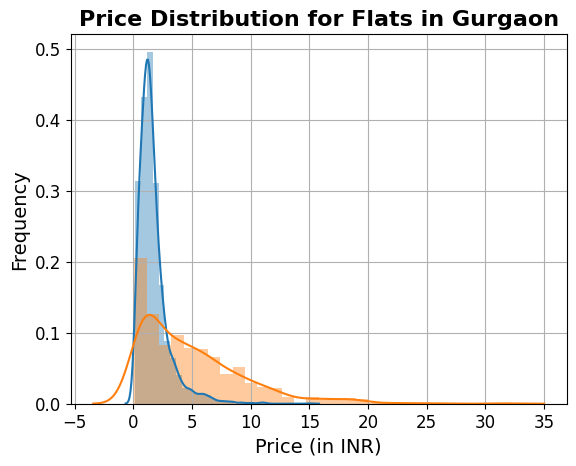

In [50]:
# Create the histogram with KDE for the 'price' column where 'Property_type' is 'flat'
sns.distplot(data[data['Property_type'] == 'flat']['price'], bins=30,label='flat')
sns.distplot(data[data['Property_type'] == 'house']['price'], bins=30,label='house')
# Customize the plot
plt.title('Price Distribution for Flats in Gurgaon', fontsize=16, fontweight='bold')  # Title with font customization
plt.xlabel('Price (in INR)', fontsize=14)  # X-axis label with fontsize
plt.ylabel('Frequency', fontsize=14)  # Y-axis label with fontsize
plt.grid(True)  # Enable grid lines
plt.tick_params(axis='both', which='major', labelsize=12)  # Customize tick labels size

In [54]:
data[data['price']==0.08]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,...,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3028,house,Independent,sohna road,0.08,2525.0,316.83,Plot area 33(27.59 sq.m.),1.0,1.0,3+,...,NaN,2673.0,NaN,0,0,0,0,0,0,0.0


In [62]:
df[df['price'].astype(str).str.contains('-5')]

,Property_type,society,sector,price,Price_per_sqrt,Area,bedRoom,bathroom,balcony,floorNum,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score


<Axes: xlabel='floor_category', ylabel='agePossession'>

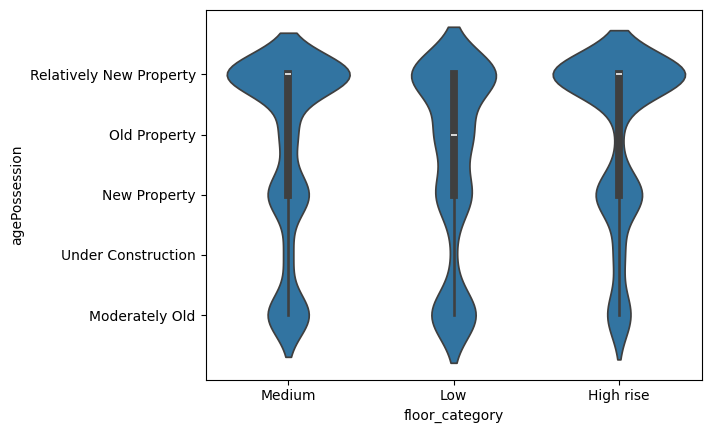

In [150]:
X=pd.read_csv('/content/gurgaon_property_real_estate_data_before_ordinal_encoding')
sns.violinplot(X,x='floor_category',y='agePossession')

In [74]:
X.head()

,Property_type,sector,price,bedRoom,bathroom,balcony,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_category,floor_category
0,flat,sector 7,0.45,2.0,2.0,2,Relatively New Property,1013.0,0,0,0,0,0,1,Low,Medium
1,flat,sector 3,0.50,2.0,2.0,2,Old Property,731.0,0,0,0,0,0,1,Low,Low
2,flat,sohna road,0.40,2.0,2.0,1,New Property,669.0,0,0,0,0,0,0,Low,High rise
3,flat,sector 61,1.47,2.0,2.0,1,New Property,1350.0,1,0,0,0,0,0,moderate,Low
4,flat,sector 92,0.70,2.0,2.0,3+,Under Construction,1210.0,1,0,0,0,0,0,Low,Medium


In [76]:
X.describe()

,price,bedRoom,bathroom,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000
mean,2.359003,3.054366,3.223944,1869.194458,0.182535,0.353239,0.085634,0.167042,0.107606,0.643099
std,2.695995,1.208184,1.411318,1283.680821,0.386339,0.478044,0.279862,0.373066,0.309925,0.513225
min,0.080000,1.000000,1.000000,193.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,2.000000,2.000000,1214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,3.000000,3.000000,1620.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.547500,4.000000,4.000000,2188.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,31.500000,10.000000,12.000000,34290.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


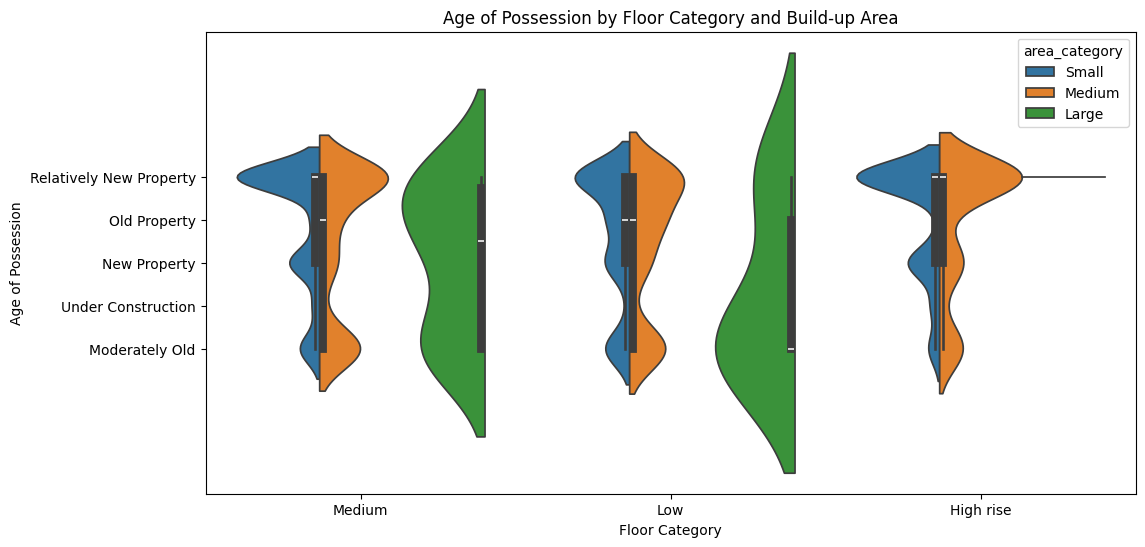

In [78]:
# Example of splitting the 'build_up_area' into categories (small, medium, large)
# If it's already a numeric value, you can categorize it based on range.
X['area_category'] = pd.cut(X['Built_Up_area'], bins=[0, 2000, 8000, 35000], labels=['Small', 'Medium', 'Large'])

# Violin plot with 'area_category' as hue
plt.figure(figsize=(12,6))
sns.violinplot(x='floor_category', y='agePossession', hue='area_category', data=X, split=True)
plt.title('Age of Possession by Floor Category and Build-up Area')
plt.xlabel('Floor Category')
plt.ylabel('Age of Possession')
plt.show()


<Axes: >

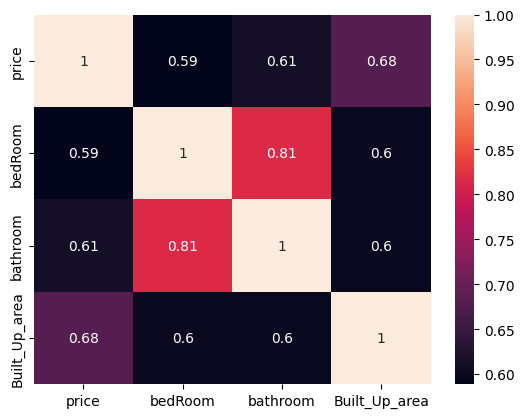

In [79]:
sns.heatmap(X[['price', 'bedRoom', 'bathroom', 'Built_Up_area']].corr(),annot=True)

In [90]:
new

,Property_type,society,sector,price,Price_per_sqrt,Area,bedRoom,bathroom,balcony,floorNum,...,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score,coordinates,lat,long
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,2.0,2.0,2,4.0,...,0,0,0,0,0,1,28.0,"28.4644° N, 77.0143° E",28.4644,77.0143
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,2.0,2.0,2,1.0,...,0,0,0,0,0,1,37.0,"28.4909° N, 77.0176° E",28.4909,77.0176
2,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,2.0,2.0,1,2.0,...,1,0,0,0,0,0,76.0,"28.4050° N, 77.0963° E",28.4050,77.0963
3,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,2.0,2.0,3+,5.0,...,1,0,0,0,0,0,0.0,"28.4079° N, 76.9153° E",28.4079,76.9153
4,flat,signature global infinity mall,sector 36,0.41,6269.0,654.011804,2.0,2.0,1,3.0,...,0,0,0,0,0,0,0.0,"28.4160° N, 76.9914° E",28.4160,76.9914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,house,vipul tatvam villa,sector 48,7.65,19125.0,4000.000000,4.0,4.0,2,2.0,...,1,1,0,0,1,0,59.0,"28.4177° N, 77.0359° E",28.4177,77.0359
3281,house,eldeco mansionz,sector 48,5.15,18885.0,2727.030000,5.0,7.0,2,2.0,...,0,1,0,1,0,1,96.0,"28.4177° N, 77.0359° E",28.4177,77.0359
3282,house,ss aaron ville,sector 49,6.75,15000.0,4500.000000,5.0,4.0,3,2.0,...,0,0,0,0,1,0,69.0,"28.4121° N, 77.0480° E",28.4121,77.0480
3283,house,Independent,sector 25,10.00,37037.0,2700.000000,5.0,5.0,3+,3.0,...,0,1,0,1,0,1,35.0,"28.4844° N, 77.0860° E",28.4844,77.0860


In [93]:
X.columns

Index(['Property_type', 'sector', 'price', 'bedRoom', 'bathroom', 'balcony',
       'agePossession', 'Built_Up_area', 'Study Room', 'Servant Room',
       'Store Room', 'Pooja Room', 'Others', 'furnish_type', 'luxury_category',
       'floor_category', 'area_category'],
      dtype='object')

In [102]:
fig = px.scatter(df, y='Built_Up_area', x='price', color='furnish_type',
                               title="Price vs. Built-up Area by Furnish Type",
                               labels={'Built_Up_area': 'Built Up Area', 'price': 'Price'},
                               color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96'])
fig.update_layout(yaxis_range=[0, 15000],xaxis_range=[0, 25])  # Update y-axis limit to 15,000
fig.show()

In [105]:
px.box(X, x='luxury_category', y='price',
                          title="Price Distribution by Luxury Category",
                          labels={'luxury_category': 'Luxury Category', 'price': 'Price'})

In [117]:
import plotly.express as px

# Customizing the Scatter Matrix Plot
fig = px.scatter_matrix(df[['price', 'Built_Up_area', 'bedRoom', 'bathroom','furnish_type']],
                        dimensions=['price', 'Built_Up_area', 'bedRoom', 'bathroom'],
                        title="Pairwise Scatter Matrix of Property Features",
                        color='furnish_type',  # Color by 'furnish_type'
                        color_continuous_scale='viridis',  # Custom color scale
                        opacity=0.7)  # Adjust opacity for better visualization


fig.show()


In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Property_type    3550 non-null   object  
 1   sector           3550 non-null   object  
 2   price            3550 non-null   float64 
 3   bedRoom          3550 non-null   float64 
 4   bathroom         3550 non-null   float64 
 5   balcony          3550 non-null   object  
 6   agePossession    3550 non-null   object  
 7   Built_Up_area    3550 non-null   float64 
 8   Study Room       3550 non-null   int64   
 9   Servant Room     3550 non-null   int64   
 10  Store Room       3550 non-null   int64   
 11  Pooja Room       3550 non-null   int64   
 12  Others           3550 non-null   int64   
 13  furnish_type     3550 non-null   int64   
 14  luxury_category  3550 non-null   object  
 15  floor_category   3550 non-null   object  
 16  area_category    3550 non-null   category


In [127]:
X.columns

Index(['Property_type', 'sector', 'price', 'bedRoom', 'bathroom', 'balcony',
       'agePossession', 'Built_Up_area', 'Study Room', 'Servant Room',
       'Store Room', 'Pooja Room', 'Others', 'furnish_type', 'luxury_category',
       'floor_category', 'area_category'],
      dtype='object')

In [128]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.treemap(X,
                 path=['sector', 'Property_type', 'furnish_type'],  # Hierarchical structure for the tree map
                 values='price',  # Size of the blocks based on price
                 color='price',  # Color based on price
                 hover_data=['bedRoom', 'bathroom', 'Built_Up_area'],  # Additional info on hover
                 color_continuous_scale='Viridis',  # Color scale
                 title="Property Distribution by Sector, Property Type, and Luxury Category"
                )

# Show the tree map in Streamlit
fig.show()


In [133]:
import plotly.express as px
px.sunburst(X,
            path=['Property_type', 'furnish_type', 'luxury_category'],  # Hierarchical structure for the sunburst plot
            values='price',  # Size of the segments based on price
            hover_data=['bedRoom', 'bathroom', 'Built_Up_area'],  # Additional info on hover
            color='price',  # Color based on price
            color_continuous_scale='Viridis',  # Color scale
            title="Property Distribution by Sector, Property Type, and Luxury Category"
           )




In [139]:
X['sector'].value_counts().head(10)

,count
sector,
sohna road,156
sector 102,109
sector 85,109
sector 92,101
sector 69,93
sector 90,91
sector 81,89
sector 65,86
sector 109,83


In [151]:
X=X[~X.index.isin([3018])]

In [152]:
X[X['price']==0.08]

,Property_type,sector,price,bedRoom,bathroom,balcony,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_category,floor_category


In [154]:

import plotly.express as px
# Select the top 20 sectors by count
top_20_sectors = X['sector'].value_counts().head(10).index
filtered_df = X[X['sector'].isin(top_20_sectors)]
fig = px.box(filtered_df,
             x='bedRoom',
             y='price',
             color='sector',  # Different colors for different sectors
             title="Price Distribution by Bedroom Count Filtered by Sector",
             labels={'bedRoom': 'Number of Bedrooms', 'price': 'Price'},
             boxmode='group'  # Groups the box plots for better comparison
            )

fig.show()


In [157]:
top_50_sectors=X['sector'].value_counts().head(50).index
filtered_df = X[X['sector'].isin(top_50_sectors)]
px.sunburst(filtered_df,
                           path=['sector', 'Property_type'],
                           values='price',
                           title="Property Distribution by Sector and Type",
                           color='price',
                           color_continuous_scale='RdBu')

In [164]:
px.box(X, x='Property_type', y='price')

In [167]:
px.box(X,
                x='Property_type',
                y='price',
                color='Property_type',  # Different colors for each category
                title="Price Distribution by Property Type",
                hover_data=['sector', 'Built_Up_area'])  # Show extra details on hover
